In [41]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
data = pd.read_excel('Data_amity_university.xlsx')  # Replace with your file path

data_2022 = pd.read_excel('Data_amity_university.xlsx', sheet_name='2022')  # Replace with your file path

print(data_2022)

    Institute ID                                              Name  \
0    IR-O-U-0456             Indian Institute of Technology Madras   
1    IR-O-U-0220                       Indian Institute of Science   
2    IR-O-U-0306            Indian Institute of Technology, Bombay   
3    IR-O-I-1074             Indian Institute of Technology, Delhi   
4    IR-O-I-1075             Indian Institute of Technology Kanpur   
..           ...                                               ...   
95  IR-O-C-16604  Sri Sivasubramaniya Nadar College of Engineering   
96   IR-O-U-0564        University of Petroleum and Energy Studies   
97   IR-O-U-0215                              Bangalore University   
98   IR-O-U-0331                 Tata Institute of Social Sciences   
99   IR-O-U-0249             Visvesvaraya Technological University   

            State  Score  Rank  TLR (100)  RPC (100)  GO (100)  OI (100)  \
0      Tamil Nadu  87.59     1      86.56      91.98     89.36     62.95   
1      

In [43]:
tlr_data = data_2022[['Name', 'TLR (100)']].copy()

In [44]:
print(tlr_data.columns)


Index(['Name', 'TLR (100)'], dtype='object')


In [45]:
tlr_data.columns = tlr_data.columns.str.strip()  # Removes leading/trailing spaces
tlr_data.columns = tlr_data.columns.str.lower()  # Converts all column names to lowercase
print(tlr_data.columns)  # Verify the updated column names


Index(['name', 'tlr (100)'], dtype='object')


In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


tlr_data = pd.read_excel('Data_amity_university.xlsx', sheet_name='2022')  

# Check and normalize column names
tlr_data.columns = tlr_data.columns.str.strip().str.lower()  # Normalize column names
print(tlr_data.columns) 


if 'tlr (100)' in tlr_data.columns:  # Check if the column exists
    scaler = StandardScaler()
    tlr_data['scaled_tlr_scores'] = scaler.fit_transform(tlr_data[['tlr (100)']])
    print(tlr_data.head())
else:
    print("Column 'tlr scores' not found in the DataFrame.")


Index(['institute id', 'name', 'state', 'score', 'rank', 'tlr (100)',
       'rpc (100)', 'go (100)', 'oi (100)', 'perception (100)'],
      dtype='object')
  institute id                                    name          state  score  \
0  IR-O-U-0456   Indian Institute of Technology Madras     Tamil Nadu  87.59   
1  IR-O-U-0220             Indian Institute of Science      Karnataka  83.57   
2  IR-O-U-0306  Indian Institute of Technology, Bombay    Maharashtra  82.35   
3  IR-O-I-1074   Indian Institute of Technology, Delhi          Delhi  82.22   
4  IR-O-I-1075   Indian Institute of Technology Kanpur  Uttar Pradesh  77.83   

   rank  tlr (100)  rpc (100)  go (100)  oi (100)  perception (100)  \
0     1      86.56      91.98     89.36     62.95             98.75   
1     2      82.08      87.45     84.80     57.46            100.00   
2     3      85.55      84.09     83.08     59.54             88.80   
3     4      81.98      84.81     79.36     70.07             93.08   
4     5

In [47]:
kmeans = KMeans(n_clusters=4, random_state=42)
tlr_data['Cluster'] = kmeans.fit_predict(tlr_data[['scaled_tlr_scores']])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


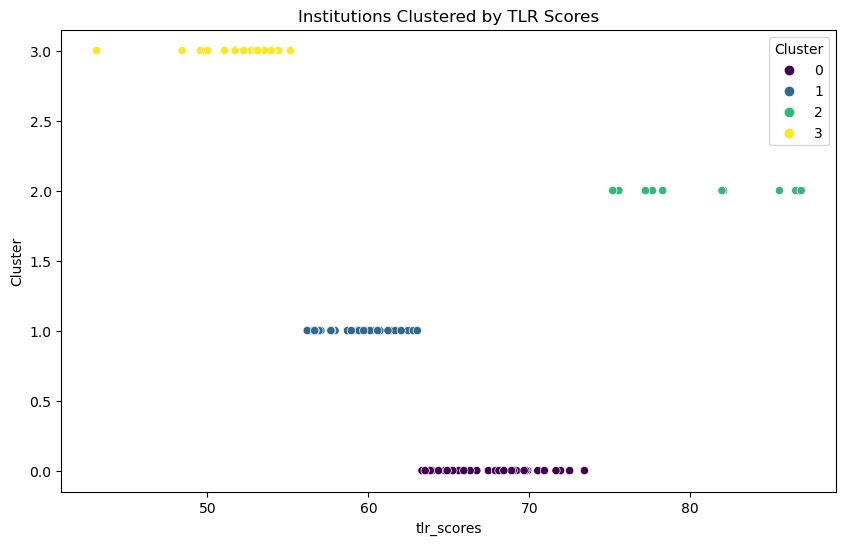

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tlr (100)', y='Cluster', data=tlr_data, hue='Cluster', palette='viridis')
plt.title('Institutions Clustered by TLR Scores')
plt.xlabel('tlr_scores')
plt.ylabel('Cluster')
plt.legend(title='Cluster')
plt.show()


In [49]:
# Find the top group (highest average TLR score)
top_group = tlr_data.groupby('Cluster')['tlr (100)'].mean().idxmax()

# List institutions in the top group
top_group_institutions = tlr_data[tlr_data['Cluster'] == top_group]
print("Institutions in the Top Group:")
print(top_group_institutions[['name', 'tlr (100)']])


Institutions in the Top Group:
                                              name  tlr (100)
0            Indian Institute of Technology Madras      86.56
1                      Indian Institute of Science      82.08
2           Indian Institute of Technology, Bombay      85.55
3            Indian Institute of Technology, Delhi      81.98
4            Indian Institute of Technology Kanpur      86.90
5        Indian Institute of Technology, Kharagpur      77.66
6          Indian Institute of Technology, Roorkee      77.22
7          Indian Institute of Technology Guwahati      78.29
8   All India Institute of Medical Sciences, Delhi      75.57
34            Indian Institute of Technology Ropar      75.19


In [50]:
top_group_institutions.to_csv('top_group_institutions_2022.csv', index=False)


In [51]:
pip install numpy pandas matplotlib seaborn gspread oauth2client


Note: you may need to restart the kernel to use updated packages.


In [53]:
data = pd.read_excel('Data_amity_university.xlsx')  # Replace with your file path

data_2022 = pd.read_excel('Data_amity_university.xlsx', sheet_name='2022')  # Replace with your file path

# Display the data from the '2024' sheet
print(data_2022)

    Institute ID                                              Name  \
0    IR-O-U-0456             Indian Institute of Technology Madras   
1    IR-O-U-0220                       Indian Institute of Science   
2    IR-O-U-0306            Indian Institute of Technology, Bombay   
3    IR-O-I-1074             Indian Institute of Technology, Delhi   
4    IR-O-I-1075             Indian Institute of Technology Kanpur   
..           ...                                               ...   
95  IR-O-C-16604  Sri Sivasubramaniya Nadar College of Engineering   
96   IR-O-U-0564        University of Petroleum and Energy Studies   
97   IR-O-U-0215                              Bangalore University   
98   IR-O-U-0331                 Tata Institute of Social Sciences   
99   IR-O-U-0249             Visvesvaraya Technological University   

            State  Score  Rank  TLR (100)  RPC (100)  GO (100)  OI (100)  \
0      Tamil Nadu  87.59     1      86.56      91.98     89.36     62.95   
1      

In [54]:
# Group by and calculate mean, median
grouped_data = data_2022.groupby('Name').agg(
    TLR_Mean=('TLR (100)', 'mean'),
    TLR_Median=('TLR (100)', 'median')
).reset_index()

print(grouped_data)


                                                 Name  TLR_Mean  TLR_Median
0                                 Alagappa University     61.66       61.66
1                           Aligarh Muslim University     69.21       69.21
2     All India Institute of Medical Sciences Jodhpur     64.36       64.36
3      All India Institute of Medical Sciences, Delhi     75.57       75.57
4                                    Amity University     49.57       49.57
..                                                ...       ...         ...
95                               University of Madras     56.58       56.58
96         University of Petroleum and Energy Studies     56.69       56.69
97                    Vellore Institute of Technology     52.72       52.72
98  Visvesvaraya National Institute of Technology,...     53.53       53.53
99              Visvesvaraya Technological University     58.94       58.94

[100 rows x 3 columns]


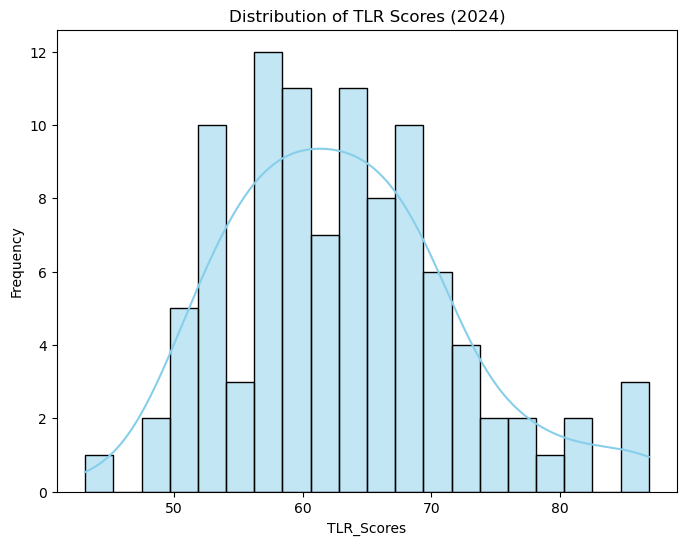

In [55]:
# TLR Scores Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data_2022['TLR (100)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of TLR Scores (2024)')
plt.xlabel('TLR_Scores')
plt.ylabel('Frequency')
plt.show()



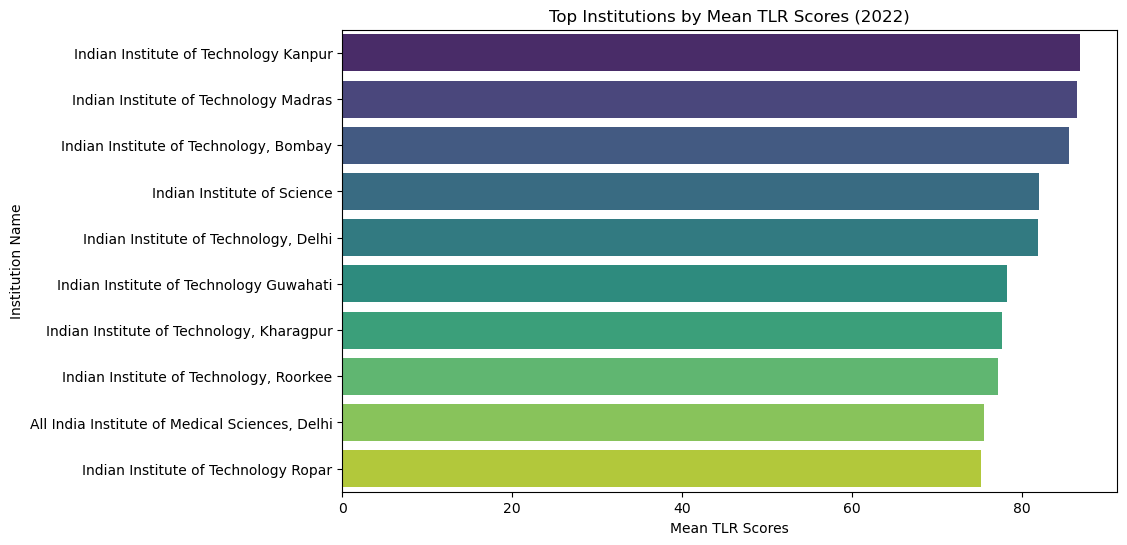

In [56]:
# Mean TLR Scores by Institution
plt.figure(figsize=(10, 6))
top_institutions = grouped_data.sort_values('TLR_Mean', ascending=False).head(10)
sns.barplot(data=top_institutions, x='TLR_Mean', y='Name', palette='viridis')
plt.title('Top Institutions by Mean TLR Scores (2022)')
plt.xlabel('Mean TLR Scores')
plt.ylabel('Institution Name')
plt.show()